In [2]:
import numpy as np
import pandas as pd
import pickle

from isttc.scripts.cfg_global import project_folder_path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [30]:
results_folder_zeros = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau_zeros\\'

fig_folder = project_folder_path + 'results\\synthetic\\figures\\'

In [31]:
save_fig = True

### Load data

In [10]:
with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_500.pkl', "rb") as f:
    sttc_trial_concat_dict_500 = pickle.load(f)

with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_900.pkl', "rb") as f:
    sttc_trial_concat_dict_900 = pickle.load(f)

# with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_950.pkl', "rb") as f:
#     sttc_trial_concat_dict_950 = pickle.load(f)

with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_1000.pkl', "rb") as f:
    sttc_trial_concat_dict_1000 = pickle.load(f)

with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_2000.pkl', "rb") as f:
    sttc_trial_concat_dict_2000 = pickle.load(f)

with open(results_folder_zeros + 'sttc_trial_concat_50ms_40_trials_dict_zero_padding_len_3000.pkl', "rb") as f:
    sttc_trial_concat_dict_3000 = pickle.load(f)

print(f'len sttc_trial_concat_dict_500 {len(sttc_trial_concat_dict_500)}')
print(f'len sttc_trial_concat_dict_900 {len(sttc_trial_concat_dict_900)}')
# print(f'len sttc_trial_concat_dict_950 {len(sttc_trial_concat_dict_950)}')
print(f'len sttc_trial_concat_dict_1000 {len(sttc_trial_concat_dict_1000)}')
print(f'len sttc_trial_concat_dict_2000 {len(sttc_trial_concat_dict_2000)}')
print(f'len sttc_trial_concat_dict_3000 {len(sttc_trial_concat_dict_3000)}')

len sttc_trial_concat_dict_500 100
len sttc_trial_concat_dict_900 100
len sttc_trial_concat_dict_1000 100
len sttc_trial_concat_dict_2000 100
len sttc_trial_concat_dict_3000 100


### Make summary dfs

In [5]:
def get_trials_plot_df(trial_dict_, padding_, method_, n_iteration_=None):
    records = []
    for unit_id, data in trial_dict_.items():
        taus = data['taus']
        acfs = data['acf']

        if n_iteration_ is not None:
            # only one trial per unit
            idx = n_iteration_[unit_id]
            taus_to_iter = [(taus[idx], acfs[idx])]
        else:
            # all trials for this unit
            taus_to_iter = zip(taus, acfs)

        for tau_dict, acf_array in taus_to_iter:
            records.append({
                'unit_id': unit_id,
                'tau': tau_dict['tau'],
                'fit_r_squared': tau_dict['fit_r_squared'],
                'method': method_,
            })

    tau_df = pd.DataFrame.from_records(records)
    tau_df['tau_ms'] = tau_df['tau'] * 50
    tau_df['padding'] = padding_

    nan_count = tau_df.isna().any(axis=1).sum()
    if nan_count > 0:
        print(f'N rows with NaNs {nan_count}')

    return tau_df

In [11]:
random_trials_impl = np.zeros(len(sttc_trial_concat_dict_950)).astype(int)

padding500_df = get_trials_plot_df(sttc_trial_concat_dict_500, 500, 'sttc_trial_concat', random_trials_impl)
padding900_df = get_trials_plot_df(sttc_trial_concat_dict_950, 900, 'sttc_trial_concat', random_trials_impl)
# padding950_df = get_trials_plot_df(sttc_trial_concat_dict_950, 950, 'sttc_trial_concat', random_trials_impl)
padding1000_df = get_trials_plot_df(sttc_trial_concat_dict_1000, 1000, 'sttc_trial_concat', random_trials_impl)
padding2000_df = get_trials_plot_df(sttc_trial_concat_dict_2000, 2000, 'sttc_trial_concat', random_trials_impl)
padding3000_df = get_trials_plot_df(sttc_trial_concat_dict_3000, 3000, 'sttc_trial_concat', random_trials_impl)

padding_df = pd.concat([padding1000_df, padding2000_df, padding3000_df, padding900_df, padding500_df])
padding_df.reset_index(inplace=True, drop=True)

padding_df.groupby(by='padding', as_index=False)['tau'].describe()

,padding,count,mean,std,min,25%,50%,75%,max
0,500,100.0,6800.875146,19541.042244,0.000035,0.141151,2.570690,9.372750,92767.555221
1,900,100.0,4063.787662,14854.405041,0.036249,0.996182,2.491265,5.245029,87223.229700
2,1000,100.0,3912.399110,13935.218712,0.029109,0.996182,2.534506,5.253181,66906.882421
3,2000,100.0,3912.399110,13935.218712,0.029109,0.996182,2.534506,5.253181,66906.882421
4,3000,100.0,3912.399110,13935.218712,0.029109,0.996182,2.534506,5.253181,66906.882421


In [12]:
padding_df

,unit_id,tau,fit_r_squared,method,tau_ms,padding
0,0,4.151493,0.966057,sttc_trial_concat,207.574657,1000
1,1,2.191814,0.912406,sttc_trial_concat,109.590725,1000
2,2,21.722048,0.876504,sttc_trial_concat,1086.102401,1000
3,3,8.411610,0.494420,sttc_trial_concat,420.580503,1000
4,4,1.773000,0.043614,sttc_trial_concat,88.649979,1000
...,...,...,...,...,...,...
495,95,4.747631,0.616079,sttc_trial_concat,237.381533,500
496,96,1.075629,0.941944,sttc_trial_concat,53.781426,500
497,97,0.712955,0.991295,sttc_trial_concat,35.647769,500
498,98,0.471680,0.891128,sttc_trial_concat,23.584017,500


In [13]:
# extract the reference tau_ms for padding=1000
ref = padding_df[padding_df['padding'] == 1000][['unit_id', 'tau_ms']]
ref = ref.rename(columns={'tau_ms': 'tau_ms_ref'})

# merge reference back onto the full dataframe
merged = padding_df.merge(ref, on='unit_id', how='left')

# compute the difference
merged['tau_ms_diff'] = merged['tau_ms'] - merged['tau_ms_ref']

# optionally remove the reference rows themselves
diff_df = merged[merged['padding'] != 1000].copy()

diff_df

,unit_id,tau,fit_r_squared,method,tau_ms,padding,tau_ms_ref,tau_ms_diff
100,0,4.151493,0.966057,sttc_trial_concat,207.574657,2000,207.574657,0.000000
101,1,2.191814,0.912406,sttc_trial_concat,109.590725,2000,109.590725,0.000000
102,2,21.722048,0.876504,sttc_trial_concat,1086.102401,2000,1086.102401,0.000000
103,3,8.411610,0.494420,sttc_trial_concat,420.580503,2000,420.580503,0.000000
104,4,1.773000,0.043614,sttc_trial_concat,88.649979,2000,88.649979,0.000000
...,...,...,...,...,...,...,...,...
495,95,4.747631,0.616079,sttc_trial_concat,237.381533,500,195.870585,41.510949
496,96,1.075629,0.941944,sttc_trial_concat,53.781426,500,53.781426,0.000000
497,97,0.712955,0.991295,sttc_trial_concat,35.647769,500,35.647769,0.000000
498,98,0.471680,0.891128,sttc_trial_concat,23.584017,500,27.311274,-3.727257


In [14]:
#merged['tau_ms_diff_log10'] = np.abs(merged['tau_ms_diff'])
merged['tau_ms_diff_log10'] = np.log10(np.abs(merged['tau_ms_diff']) + 1)
merged

,unit_id,tau,fit_r_squared,method,tau_ms,padding,tau_ms_ref,tau_ms_diff,tau_ms_diff_log10
0,0,4.151493,0.966057,sttc_trial_concat,207.574657,1000,207.574657,0.000000,0.000000
1,1,2.191814,0.912406,sttc_trial_concat,109.590725,1000,109.590725,0.000000,0.000000
2,2,21.722048,0.876504,sttc_trial_concat,1086.102401,1000,1086.102401,0.000000,0.000000
3,3,8.411610,0.494420,sttc_trial_concat,420.580503,1000,420.580503,0.000000,0.000000
4,4,1.773000,0.043614,sttc_trial_concat,88.649979,1000,88.649979,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
495,95,4.747631,0.616079,sttc_trial_concat,237.381533,500,195.870585,41.510949,1.628501
496,96,1.075629,0.941944,sttc_trial_concat,53.781426,500,53.781426,0.000000,0.000000
497,97,0.712955,0.991295,sttc_trial_concat,35.647769,500,35.647769,0.000000,0.000000
498,98,0.471680,0.891128,sttc_trial_concat,23.584017,500,27.311274,-3.727257,0.674609


C:\Users\ipochino\AppData\Local\Temp\ipykernel_18720\2219295039.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['500', '900', 'trial length \n(1000)', '2000', '3000'])


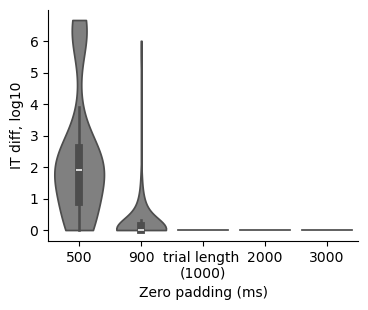

In [32]:
color = 'gray'

fig, axes = plt.subplots(1,1, figsize=(4,3))
plt.subplots_adjust(hspace=0.4, wspace=1.2)

#method_order = [500, 900, 950, 1000, 2000, 3000]
sns.violinplot(x='padding', y='tau_ms_diff_log10', data=merged , cut=0, density_norm='width', 
               legend=False, color=color, ax=axes)

axes.set_ylabel('IT diff, log10')
axes.set_xlabel('Zero padding (ms)')

#axes.set_xticks([500, 900, 1000, 2000, 3000])
axes.set_xticklabels(['500', '900', 'trial length \n(1000)', '2000', '3000'])

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'isttc_concat_zeros.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'isttc_concat_zeros.svg' , bbox_inches='tight')

In [33]:
#save df
padding_df.to_csv(results_folder_zeros + 'padding_df.csv')
padding_df.to_pickle(results_folder_zeros + 'padding_df.pkl')